## Classification with the use of Density Estimation

This notebook provides a quick summary and introduction on how to use the Classification and DataSet wrappers.
The wrappers work with Python version 3.8.3 or higher.

The DataSet class is intended to simplify operations on datasets, e.g. Density Estimation.
First we take a look on how to initialize a DataSet object, then we use some methods on this object to demonstrate functionality of DataSet objects.
After that you will see some examples of Classification on DataSets and their functionality.
For more information you can check out the documentation of DataSet and Classification.

***

The DataSet Constructor takes 2 arguments: the actual samples (data), and optionally a name for this DataSet object.
Data can take the form of:
+ a string (path to a CSV file which will be read and transformed into usable data; *not implemented yet*)
+ a n-dimensional ndarray with type float64
+ a 2-dimensional tuple with its first entry being a n-dimensional ndarray of size m with type float64 and its second entry being a 1-dimensional ndarray of size m with type int64

No matter the input, after initialization the data will have the form of the 3rd possibility.
A possible dataset generator with randomized samples but a still distinguishable form is the dataset module from sklearn (which we will use during this tutorial).

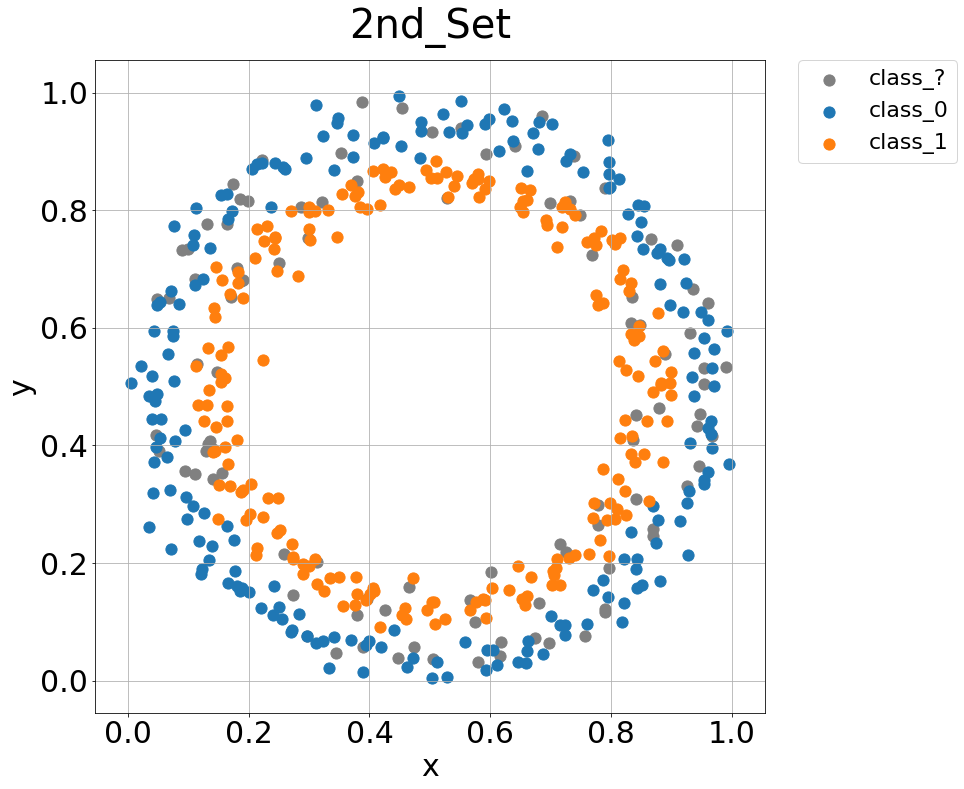

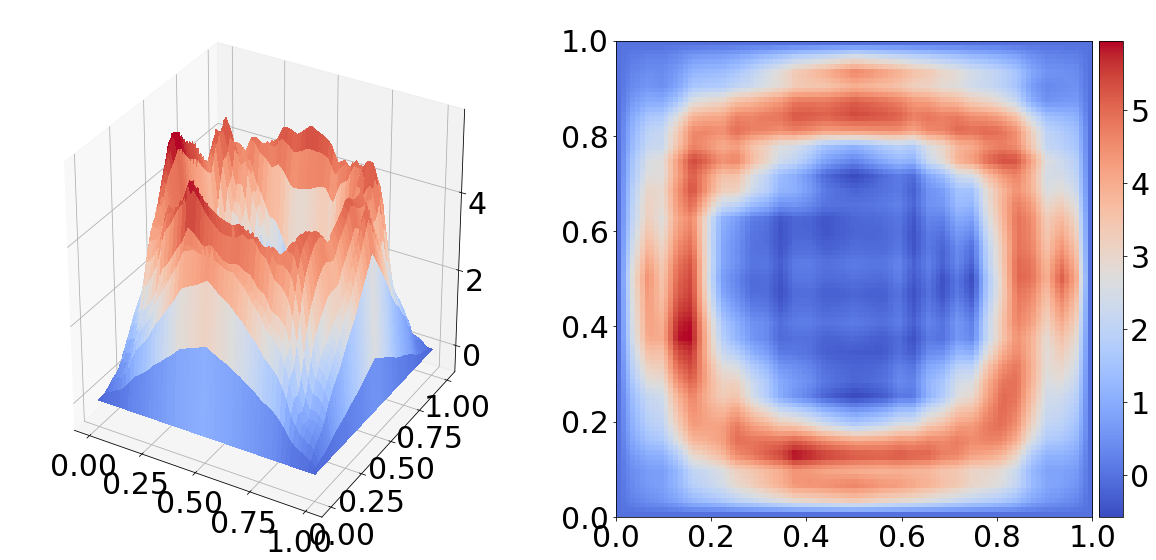

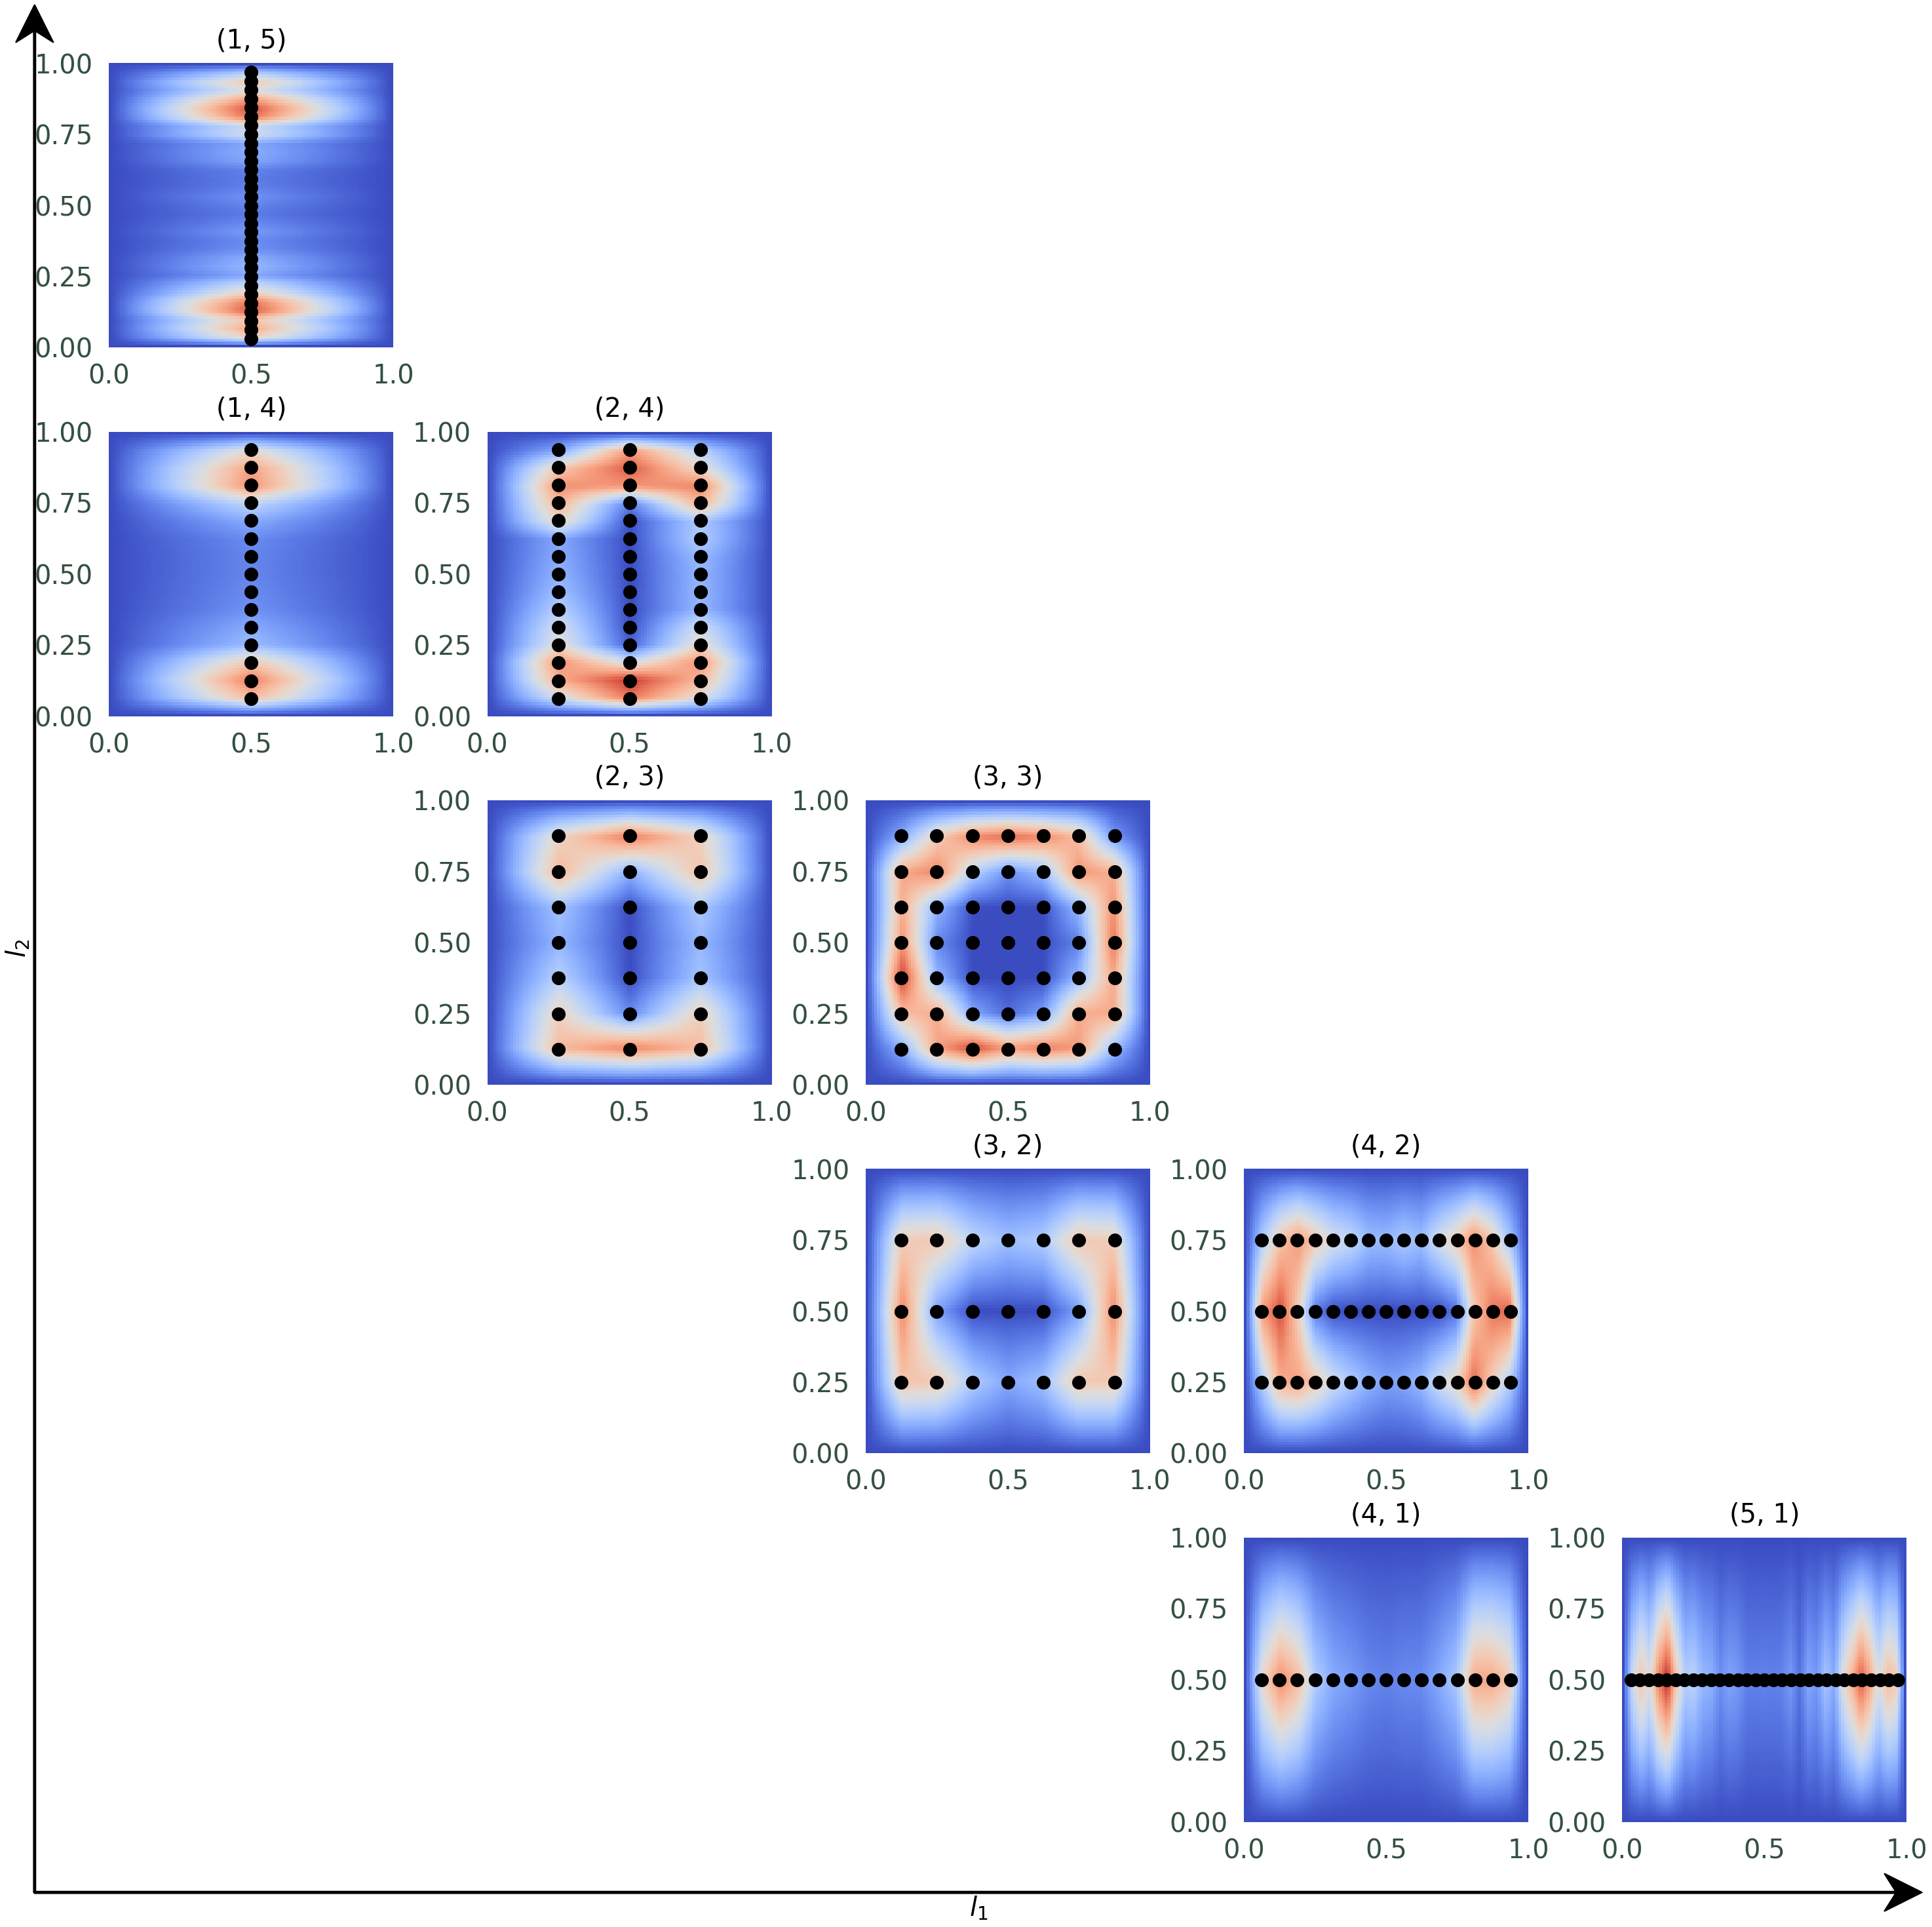

In [1]:
from sys import path
path.append('../src/')
%matplotlib inline
import DatasetOperation as do


# generate a Circle-Dataset of size with the sklearn library
size = 500
sklearn_dataset = do.datasets.make_circles(n_samples=size, noise=0.05)
# sklearn_dataset = do.datasets.make_moons(n_samples=size, noise=0.3)
# sklearn_dataset = do.datasets.make_classification(size, n_features=2, n_redundant=0, n_clusters_per_class=1, n_informative=1, n_classes=2)
# sklearn_dataset = do.datasets.make_classification(size, n_features=2, n_redundant=0, n_clusters_per_class=1, n_informative=2, n_classes=3)
# sklearn_dataset = do.datasets.make_blobs(n_samples=size, n_features=2, centers=6)
# sklearn_dataset = do.datasets.make_gaussian_quantiles(n_samples=size, n_features=2, n_classes=6)

# now we can transform this dataset into a DataSet object and give it an appropriate name
data = do.DataSet(sklearn_dataset, name='Testset')

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# now let's look at some functions of the DataSet class

# DataSet objects can e.g. be ...
data_copy = data.copy()                                              # deepcopied
data_copy.scale_range((0.005, 0.995))                                # scaled
part0, part1 = data_copy.split_pieces(0.5)                           # split
data_copy = part0.concatenate(part1)                                 # concatenated
data_copy.set_name('2nd_Set')                                        # renamed
data_copy.remove_classes(0.2)                                        # freed of some class assignments to samples
without_classes, with_classes = data_copy.split_without_classes()    # seperated into samples with and without classes
data_copy.plot()                                                     # plotted

# and of course we can perform a regular density estimation on a DataSet object:
de_retval = data_copy.density_estimation(plot_de_dataset=False, plot_sparsegrid=False, plot_density_estimation=True, plot_combi_scheme=True)

***

## How to use the Classification Class

Now that we created some DataSets we can perform classifications on them.

First we need to initialize a Classification object.
The Classification Constructor therefore accepts 4 arguments: a DataSet and three optional parameters:
+ initial DataSat on which to perform the classification
+ an optional explicitly stated data range of the DataSet
+ a percentage factor which specifies how much percentage of the input DataSet should be used as learning dataset, the rest will be used for testing later on
+ a boolean value which specifies whether the learning data should consist of evenly or randomly sized classes (not valid if 0 < percentage < 1)

After initialization there is a more or less strict order in which methods to a created Classification object should be called.

Performed Classification of 'Testset' DataSet.
_________________________________________________________________________________________________________________________________
---------------------------------------------------------------------------------------------------------------------------------
Evaluation:
Number of wrong mappings: 8
Number of total mappings: 100
Percentage of correct mappings: 92.00%
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Points mapped incorrectly:
0: [0.18882818 0.15685507] | correct class: 0, calculated class: 1 | density_class0: [4.05331766], density_class1: [4.06599809], 
1: [0.16585224 0.16622955] | correct class: 0, calculated class: 1 | density_class0: [3.35827557], density_class1: [4.6089059], 
2: [0.84432101 0.80850728] | correct class: 0, calculated class: 1 | density_class0: [3.1375174], density_class1: [4.40926494], 
3: [0.23667812 0.80586223] | correct cl

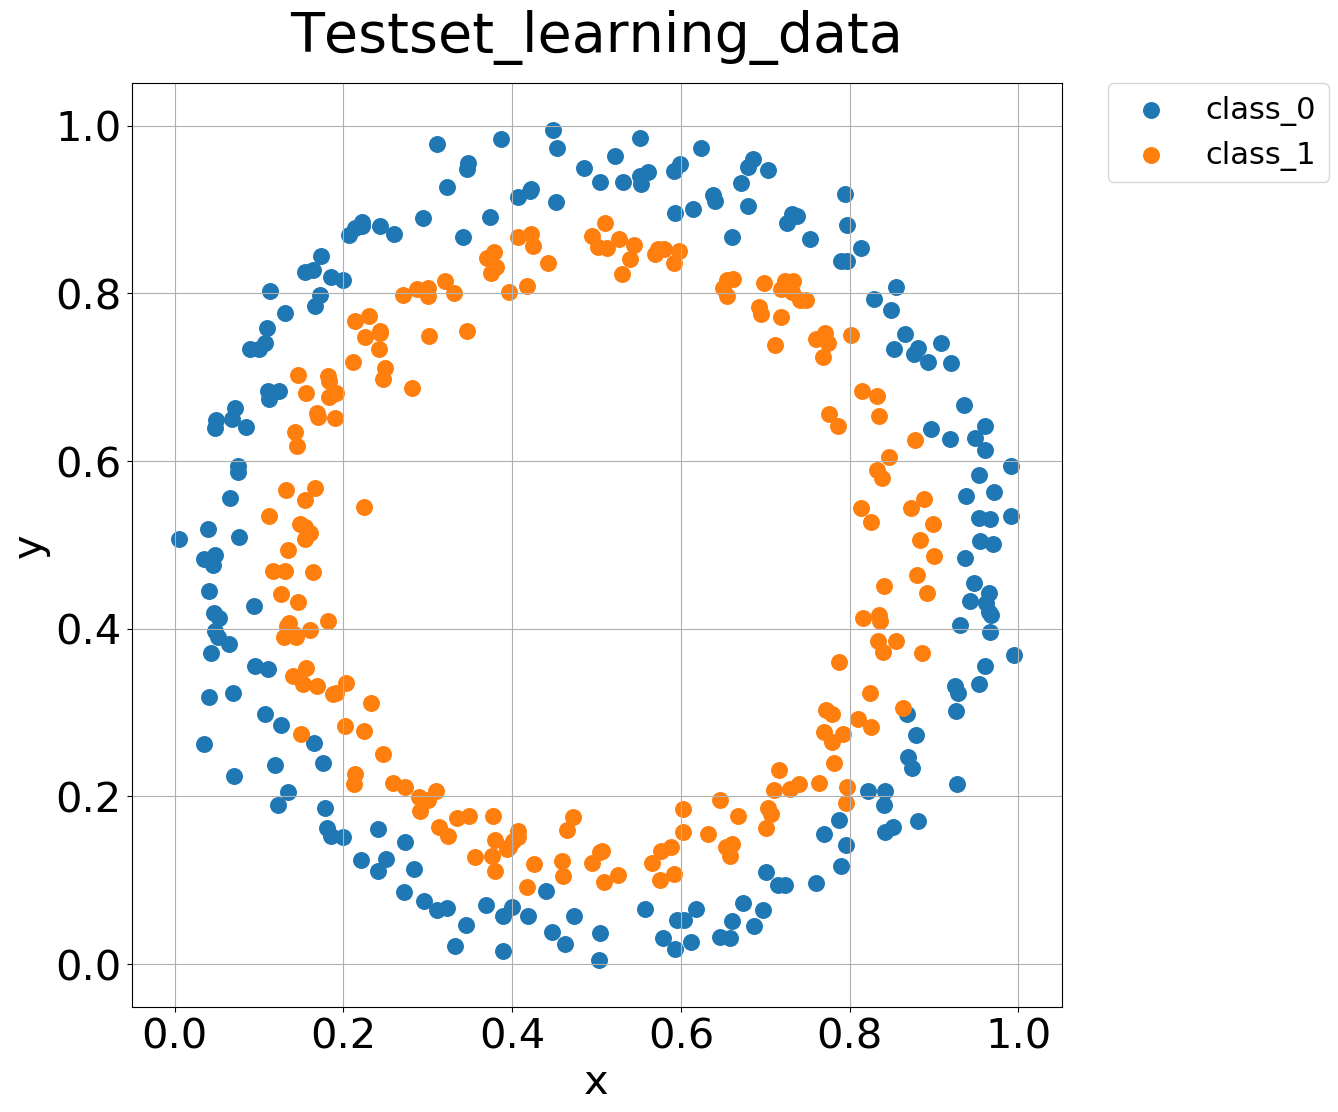

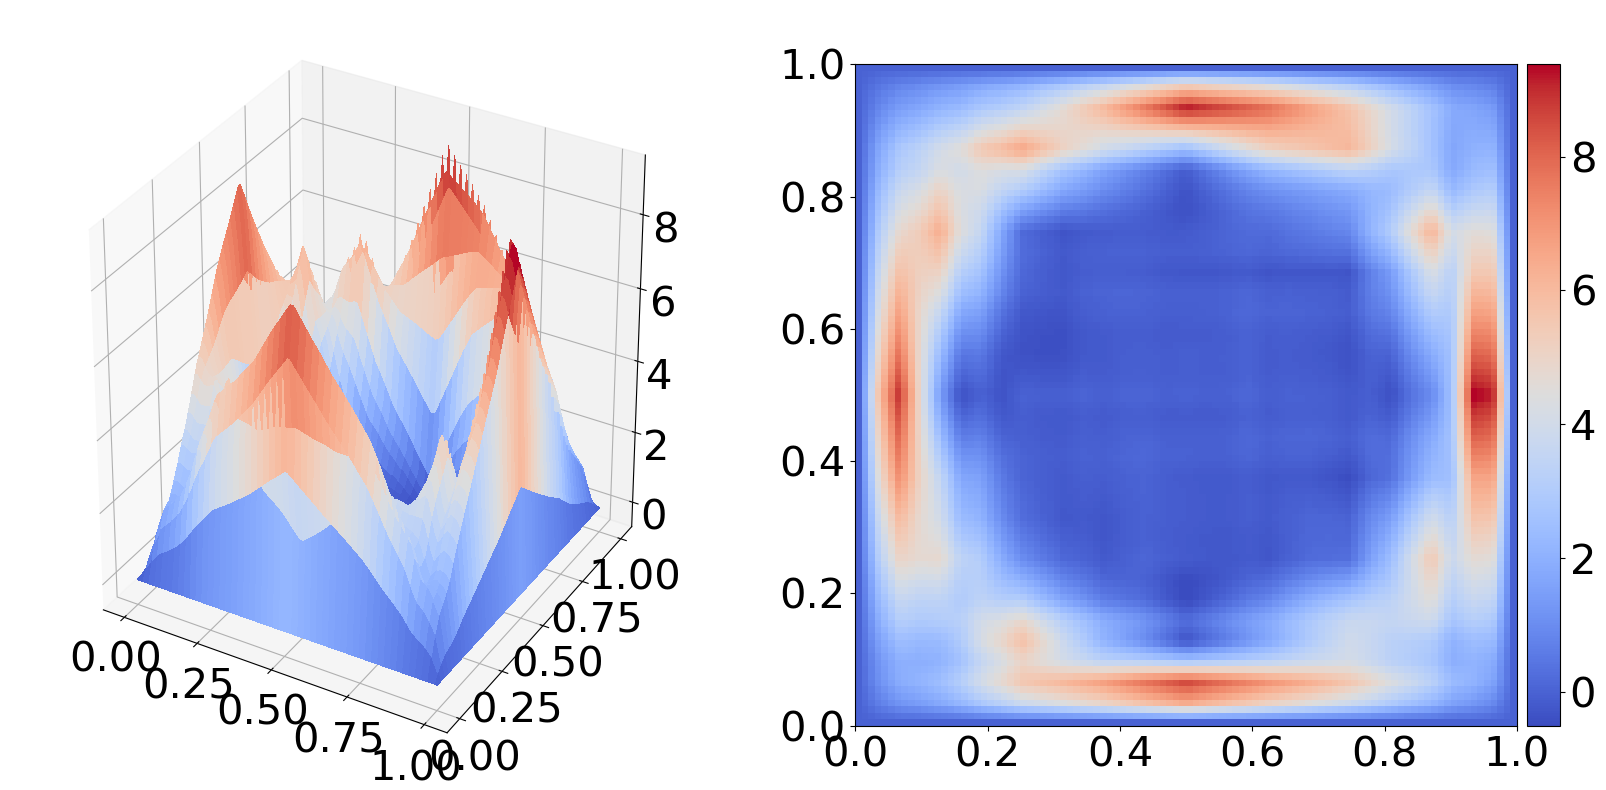

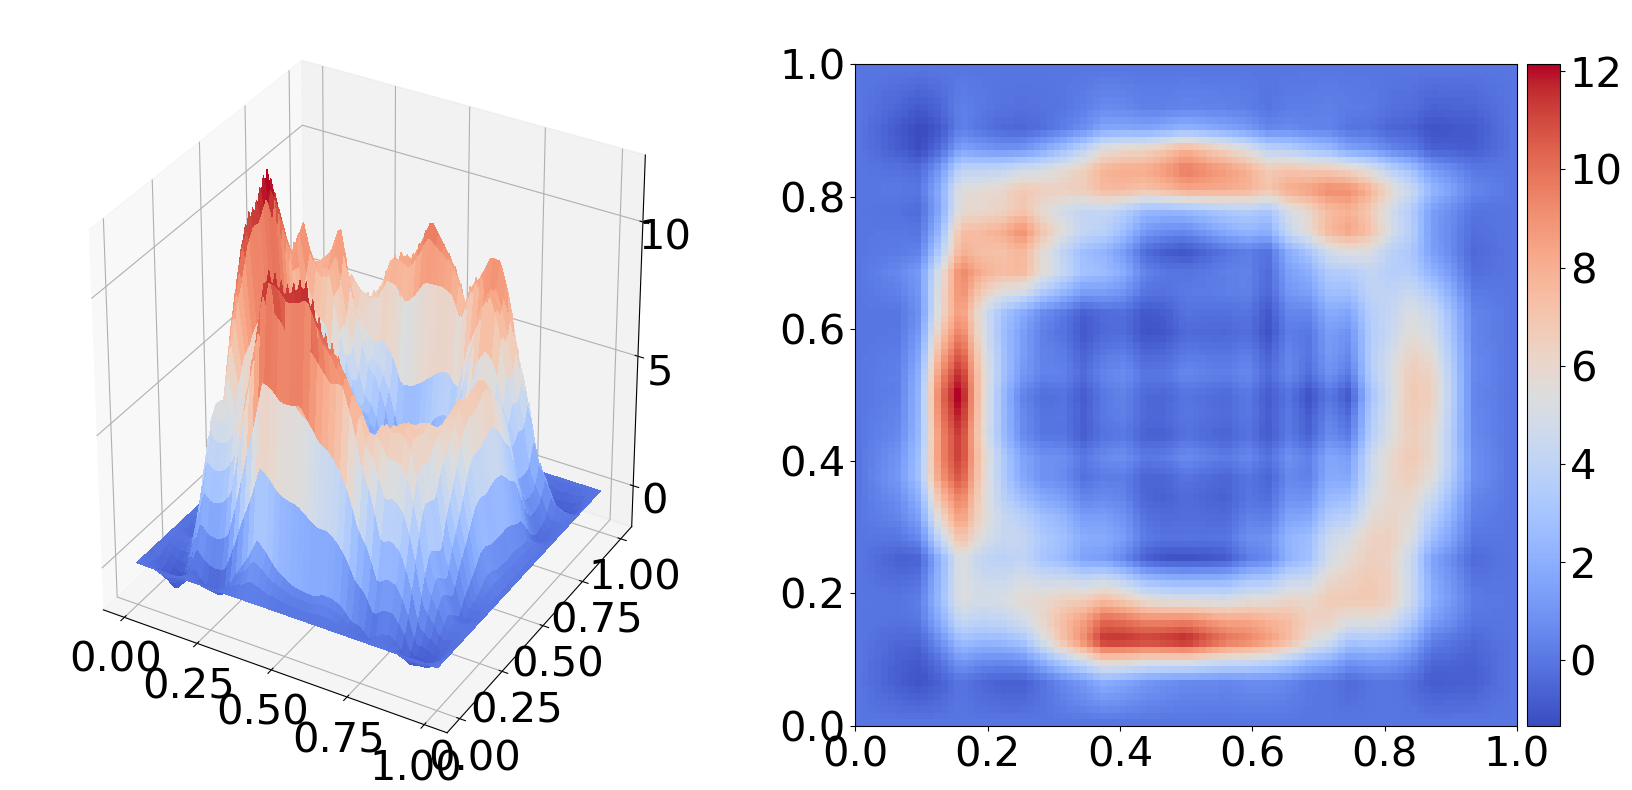

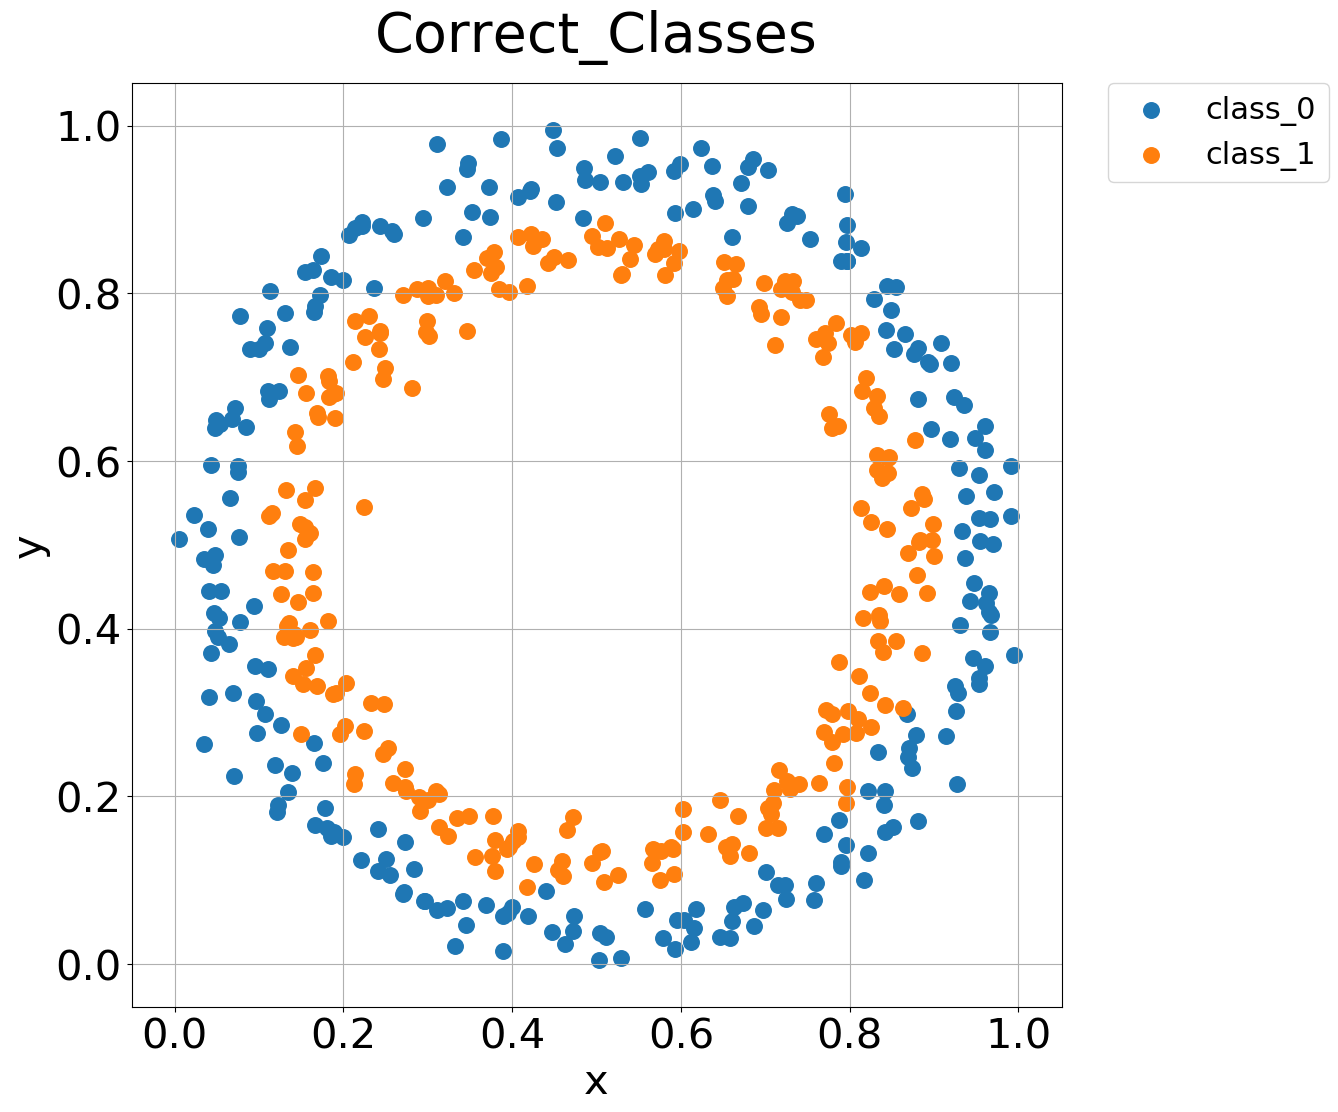

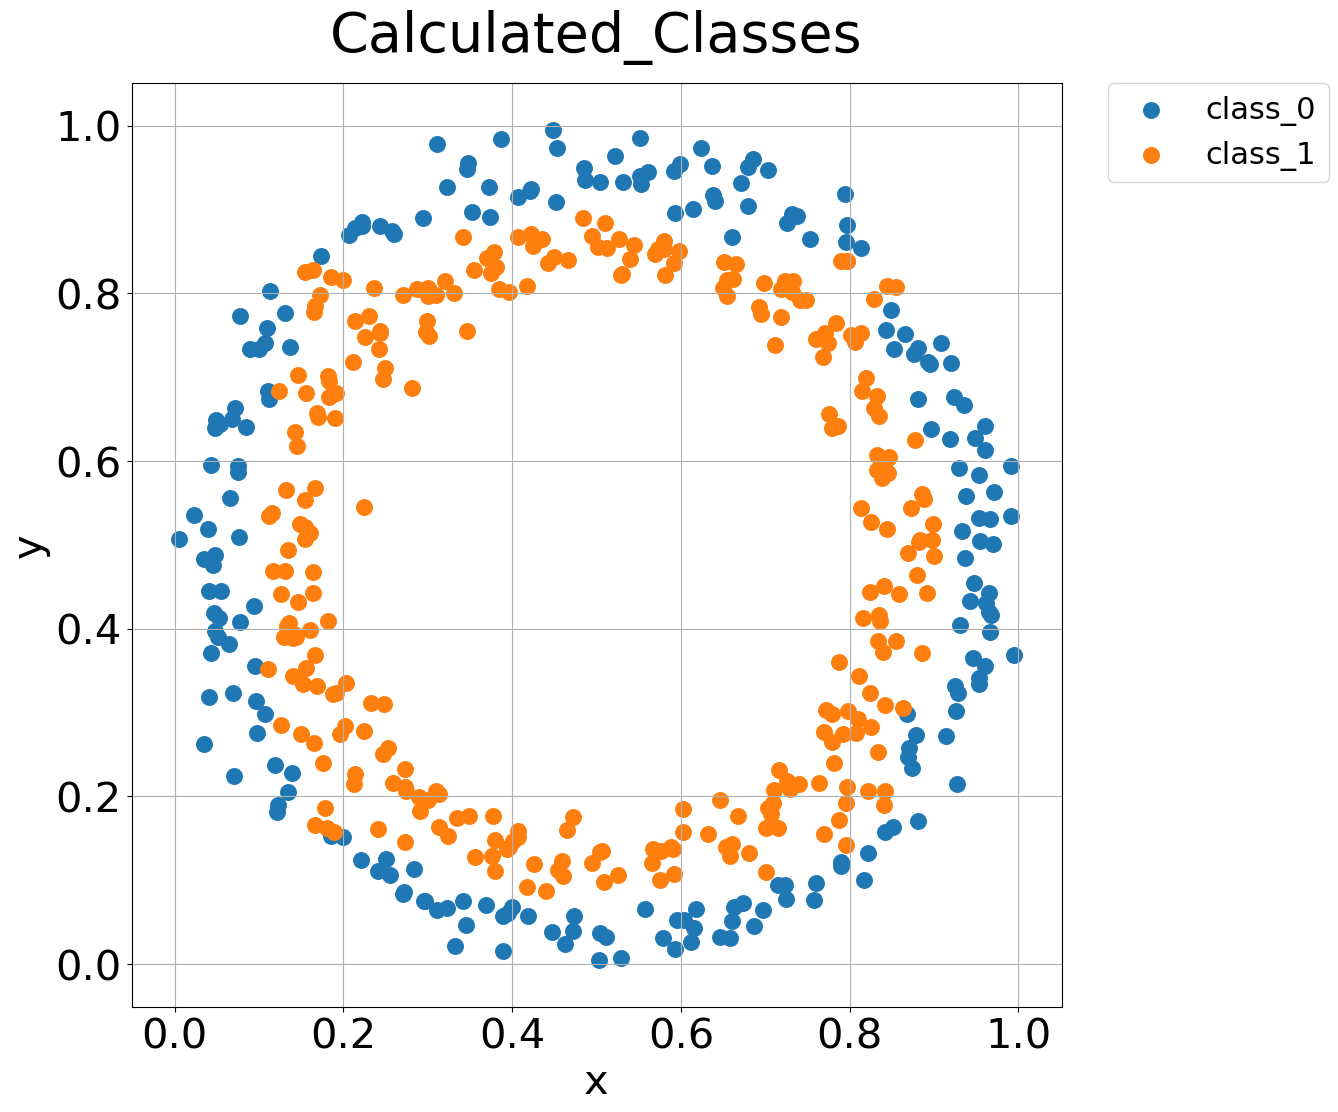

In [2]:
# initialize Classification object with our original unedited data, 80% of this data is going to be used as learning data which has equally
# distributed classes
classification = do.Classification(data, split_percentage=0.8, split_evenly=True)

# after that we should immediately perform the classification for the learning data tied to the Classification object, since we can't really call any other method before that without raising an error
classification.perform_classification(masslumping=True, lambd=0.0, minimum_level=1, maximum_level=5)

# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# now we can perform some other operations on this classification object

# we could e.g. plot its classificators and corresponding density estimations
classification.plot(plot_class_sparsegrid=False, plot_class_combi_scheme=False, plot_class_dataset=True, plot_class_density_estimation=True)

# if we already added some testing data to the Classification object (which we did in the initialization process, 20% of samples are testing samples), we can print the current evaluation
classification.print_evaluation()

# we can also add more testing data and print the results immediately
with_classes.set_name("Test_new_data")
classification.test_data(with_classes, print_output=True)

# and we can call the Classification object to perform blind classification on a dataset with unknown class assignments to its samples
data_copy.remove_classes(1.0)
calcult_classes = classification(data_copy)

# because we used 2D datasets before, we can plot the results to easily see which samples were classified correctly and which not
correct_classes = data.copy()
correct_classes.scale_range((0.005, 0.995))
correct_classes.set_name('Correct_Classes')
calcult_classes.set_name('Calculated_Classes')
retfig0 = correct_classes.plot()
retfig1 = calcult_classes.plot()